# Spotify ETL Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv('data/recent_tracks.csv')

In [2]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   played_at           50 non-null     object 
 1   track_name          50 non-null     object 
 2   artist_name         50 non-null     object 
 3   track_duration_ms   50 non-null     float64
 4   playlist_name       50 non-null     object 
 5   popularity          50 non-null     int64  
 6   artist_genres       31 non-null     object 
 7   album_name          50 non-null     object 
 8   album_release_date  50 non-null     object 
 9   album_id            50 non-null     object 
 10  track_id            50 non-null     object 
 11  artist_ids          50 non-null     object 
 12  playlist_id         50 non-null     object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ KB


In [3]:
# first 5 rows of the data
df.head()

,played_at,track_name,artist_name,track_duration_ms,playlist_name,popularity,artist_genres,album_name,album_release_date,album_id,track_id,artist_ids,playlist_id
0,2024-08-25 18:01:28,The Approaching Night,Elias Freedom,159.579,Amelie Soundtracks,41,NaN,The Approaching Night,2022-04-23,1gbnePFcPjBks5fUIAkbjc,33VMQ5tXJjjuDmOBklNWbd,14MDig5DwBw9wrIhce4lPs,6QeJJyMcTjVzjc0382jjoK
1,2024-08-25 18:03:53,Chasing Stars,Oscar Lynn,144.149,Amelie Soundtracks,41,NaN,Chasing Stars,2022-04-23,2ceBNWAz6iCJQF66RHWhUb,3NnxE7YROv1bJtjy6DpfYF,1fNxx6X8Ae361qBTlCKTtT,6QeJJyMcTjVzjc0382jjoK
2,2024-08-25 18:06:04,Breathe,Oscar Lynn,130.570,Amelie Soundtracks,41,NaN,Breathe,2022-04-23,7uSruNPuddih2WTTmE8yLJ,6fsrI0v5fFoKxBwLylvgmp,1fNxx6X8Ae361qBTlCKTtT,6QeJJyMcTjVzjc0382jjoK
3,2024-08-25 18:09:31,Bluebird,Oscar Lynn,206.217,Amelie Soundtracks,44,NaN,Bluebird,2022-04-23,4WclUiBu5Ff59eqADXgFMJ,1qPjR9QOif2p0Xr7XIeZQv,1fNxx6X8Ae361qBTlCKTtT,6QeJJyMcTjVzjc0382jjoK
4,2024-08-25 18:12:32,"All My Joy, All My Pain",Oscar Lynn,180.461,Amelie Soundtracks,42,NaN,"All My Joy, All My Pain",2022-04-23,4aZfAbzaXyoMrRtkagnXpF,3PwSGW6ln6BVcYz7zHKuql,1fNxx6X8Ae361qBTlCKTtT,6QeJJyMcTjVzjc0382jjoK


In [4]:
# check for missing values
df.isnull().sum()

played_at              0
track_name             0
artist_name            0
track_duration_ms      0
playlist_name          0
popularity             0
artist_genres         19
album_name             0
album_release_date     0
album_id               0
track_id               0
artist_ids             0
playlist_id            0
dtype: int64

### Some numbers

In [5]:
unique_tracks = df['track_name'].nunique()
print(f"Total unique tracks: {unique_tracks}")

Total unique tracks: 50


In [6]:
unique_artists = df['artist_name'].nunique()
print(f"Total unique artists: {unique_artists}")

Total unique artists: 32


In [7]:
unique_genres = df['artist_genres'].nunique()
print(f"Total unique genres: {unique_genres}")

Total unique genres: 20


### Top tracks and artists

In [8]:
top_tracks = df['track_name'].value_counts().head(10)
print("Top 10 tracks:")
print(top_tracks)

Top 10 tracks:
track_name
The Approaching Night                                                       1
Fontaine                                                                    1
EA Sports Football Theme                                                    1
Mirage Theme - From Assassin's Creed Mirage                                 1
Into the Starfield (Main Theme)                                             1
Secunda (Transcr. Trifonov for Piano) - From "The Elder Scrolls: Skyrim"    1
Elden Ring                                                                  1
Greater Together (Album Version)                                            1
Fields of Dusk - Orchestral Version                                         1
Geralt Of Rivia                                                             1
Name: count, dtype: int64


In [9]:
top_artists = df['artist_name'].value_counts().head(10)
print("Top 10 artists:")
print(top_artists)

Top 10 artists:
artist_name
Fenton Sykes           5
Boccaccio Capello      5
Oscar Lynn             5
Castello de Rossi      3
Gustavo Santaolalla    2
Tsukasa Saitoh         2
Jeremy Soule           2
P.T. Adamczyk          2
Elias Freedom          1
Nick Arundel           1
Name: count, dtype: int64


### times when I listen to music 

In [10]:
# 'playd_at' column is in string format, convert it to datetime
df['played_at'] = pd.to_datetime(df['played_at'])

# create new columns for year, month, day, day of week and hour
df['day_of_month'] = df['played_at'].dt.day
df['day_of_week'] = df['played_at'].dt.day_name()
df['hour_of_day'] = df['played_at'].dt.hour

df.head()

,played_at,track_name,artist_name,track_duration_ms,playlist_name,popularity,artist_genres,album_name,album_release_date,album_id,track_id,artist_ids,playlist_id,day_of_month,day_of_week,hour_of_day
0,2024-08-25 18:01:28,The Approaching Night,Elias Freedom,159.579,Amelie Soundtracks,41,NaN,The Approaching Night,2022-04-23,1gbnePFcPjBks5fUIAkbjc,33VMQ5tXJjjuDmOBklNWbd,14MDig5DwBw9wrIhce4lPs,6QeJJyMcTjVzjc0382jjoK,25,Sunday,18
1,2024-08-25 18:03:53,Chasing Stars,Oscar Lynn,144.149,Amelie Soundtracks,41,NaN,Chasing Stars,2022-04-23,2ceBNWAz6iCJQF66RHWhUb,3NnxE7YROv1bJtjy6DpfYF,1fNxx6X8Ae361qBTlCKTtT,6QeJJyMcTjVzjc0382jjoK,25,Sunday,18
2,2024-08-25 18:06:04,Breathe,Oscar Lynn,130.570,Amelie Soundtracks,41,NaN,Breathe,2022-04-23,7uSruNPuddih2WTTmE8yLJ,6fsrI0v5fFoKxBwLylvgmp,1fNxx6X8Ae361qBTlCKTtT,6QeJJyMcTjVzjc0382jjoK,25,Sunday,18
3,2024-08-25 18:09:31,Bluebird,Oscar Lynn,206.217,Amelie Soundtracks,44,NaN,Bluebird,2022-04-23,4WclUiBu5Ff59eqADXgFMJ,1qPjR9QOif2p0Xr7XIeZQv,1fNxx6X8Ae361qBTlCKTtT,6QeJJyMcTjVzjc0382jjoK,25,Sunday,18
4,2024-08-25 18:12:32,"All My Joy, All My Pain",Oscar Lynn,180.461,Amelie Soundtracks,42,NaN,"All My Joy, All My Pain",2022-04-23,4aZfAbzaXyoMrRtkagnXpF,3PwSGW6ln6BVcYz7zHKuql,1fNxx6X8Ae361qBTlCKTtT,6QeJJyMcTjVzjc0382jjoK,25,Sunday,18


In [11]:
weekday_counts = df['day_of_week'].value_counts()
print("Listening habits by day of week:")
print(weekday_counts)

Listening habits by day of week:
day_of_week
Sunday    50
Name: count, dtype: int64


In [12]:
hourly_counts = df['hour_of_day'].value_counts().sort_index()
print("Listening habits by hour of day:")
print(hourly_counts)

Listening habits by hour of day:
hour_of_day
18    19
19    18
20    13
Name: count, dtype: int64


### top genres

In [13]:
top_genres = df['artist_genres'].value_counts().head(10)
print("Top 10 genres:")
print(top_genres)

Top 10 genres:
artist_genres
video game music                                                                           6
orchestral soundtrack, scorecore, video game music                                         3
soundtrack, video game music                                                               3
argentine ambient, latin classical, latin soundtrack, orchestral soundtrack, soundtrack    2
japanese vgm                                                                               2
orchestral soundtrack, scorecore, soundtrack                                               1
british soundtrack, orchestral soundtrack, soundtrack                                      1
japanese vgm, sound team, video game music                                                 1
scorecore, video game music                                                                1
old west                                                                                   1
Name: count, dtype: int64


### Data Visualization

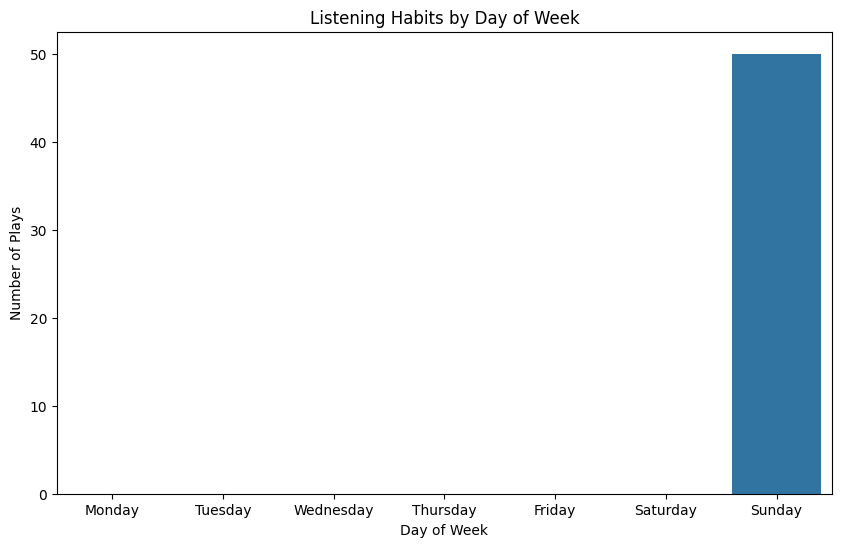

In [14]:
# Kuuntelutottumukset eri viikonpäivinä
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Listening Habits by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Plays')
plt.show()

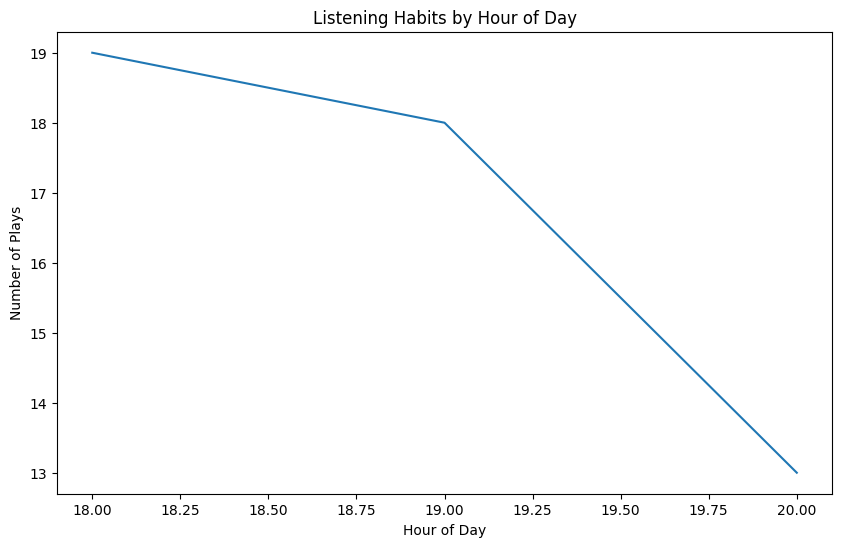

In [15]:
# listening habits by hour of day
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_counts)
plt.title('Listening Habits by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Plays')
plt.show()

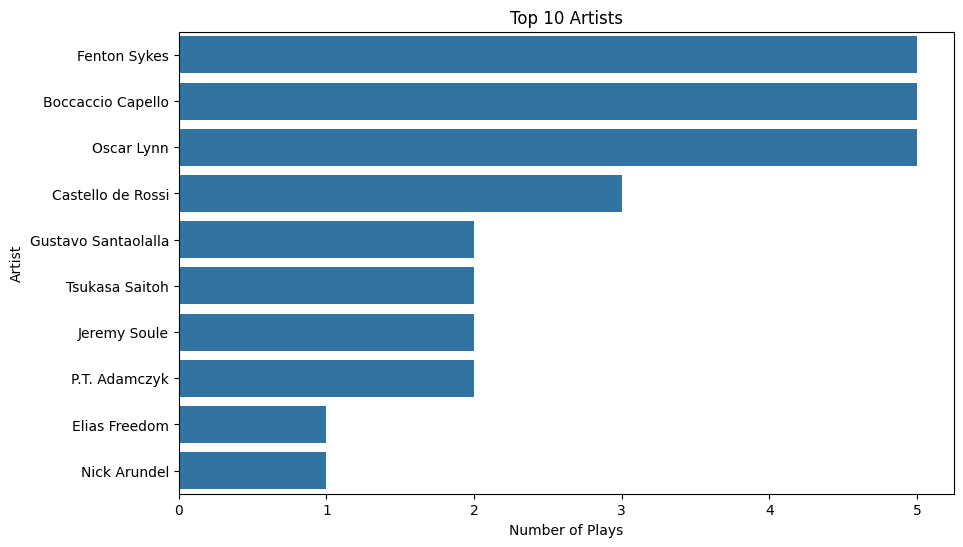

In [16]:
# top artists
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists')
plt.xlabel('Number of Plays')
plt.ylabel('Artist')
plt.show()

### Using postgreSQL

In [43]:
from sqlalchemy import create_engine
import pandas as pd

# Database credentials
db_host = 'localhost'
db_port = '5432'
db_name = 'spotify_db'
db_user = 'suqqura'
db_password = 'keiju'

# Create the database engine
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Using a connection and cursor with SQLAlchemy
with engine.connect() as conn:
    with conn.connection.cursor() as curs:
        curs.execute("SELECT * FROM recent_tracks LIMIT 5;")
        rows = curs.fetchall()

        # Convert the result into a pandas DataFrame
        df = pd.DataFrame(rows, columns=[desc[0] for desc in curs.description])
        print(df)
    conn.close()

            played_at                                      track_name  \
0 2024-08-25 12:21:04     The Ghost's House (From "Link's Awakening")   
1 2024-08-25 12:23:03                                Tiny Butterflies   
2 2024-08-25 12:24:34                                    Signal Flags   
3 2024-08-25 12:27:51  A Town With an Ocean View (Cafe Music Version)   
4 2024-08-25 12:30:16                                    Manhattanite   

              artist_name  track_duration_ms  popularity     artist_genres  \
0            Lucas Cooper             82.133          41         lo-fi vgm   
1            Ofelia Moore            118.045          27               NaN   
2          Satoshi Takebe             91.000          48       anime score   
3  Cafe Music BGM channel            196.524          26  background music   
4                   Frook            144.354          35       lo-fi beats   

                                  album_name album_release_date  \
0                   Zelda

In [44]:
with engine.connect() as conn:
    with conn.connection.cursor() as curs:
        # Example: Fetch tracks played on a specific date
        curs.execute("""
            SELECT * FROM recent_tracks
            WHERE played_at::date = '2024-08-25';
        """)
        rows = curs.fetchall()

        # Convert to DataFrame
        df = pd.DataFrame(rows, columns=[desc[0] for desc in curs.description])
        print(df)
    conn.close()


             played_at                                         track_name  \
0  2024-08-25 12:21:04        The Ghost's House (From "Link's Awakening")   
1  2024-08-25 12:23:03                                   Tiny Butterflies   
2  2024-08-25 12:24:34                                       Signal Flags   
3  2024-08-25 12:27:51     A Town With an Ocean View (Cafe Music Version)   
4  2024-08-25 12:30:16                                       Manhattanite   
..                 ...                                                ...   
84 2024-08-25 20:35:02                               The Way of the Ghost   
85 2024-08-25 20:40:00                                   The Final Battle   
86 2024-08-25 20:44:22                             Legend of Zelda: Suite   
87 2024-08-25 20:48:42        Dearly Beloved - KINGDOM HEARTS II Version-   
88 2024-08-25 20:51:57  Assassin's Creed Valhalla Main Theme (feat. Ei...   

                                          artist_name  track_duration_ms  \

In [47]:
with engine.connect() as conn:
    with conn.connection.cursor() as curs:
        # Example: Count the number of times each artist's tracks have been played
        curs.execute("""
            SELECT artist_name, COUNT(*) AS play_count
            FROM recent_tracks
            GROUP BY artist_name
            ORDER BY play_count DESC;
        """)
        rows = curs.fetchall()

        # Convert to DataFrame
        df = pd.DataFrame(rows, columns=[desc[0] for desc in curs.description])
        print(df)
    conn.close()


                                          artist_name  play_count
0                                        Yann Tiersen          12
1                                       Elias Freedom           5
2                                          Oscar Lynn           5
3                                        Fenton Sykes           5
4                                   Boccaccio Capello           5
5                              Cafe Music BGM channel           4
6                                   Castello de Rossi           3
7                                        Jeremy Soule           2
8                                 Slumbering Ensemble           2
9                                 Gustavo Santaolalla           2
10                                      P.T. Adamczyk           2
11                                     Tsukasa Saitoh           2
12                                       Ofelia Moore           2
13                                               ミツキヨ           1
14        

In [50]:
with engine.connect() as conn:
    with conn.connection.cursor() as curs:
        # Example: Fetch and export recent tracks to CSV
        curs.execute("SELECT * FROM recent_tracks;")
        rows = curs.fetchall()

        # Convert to DataFrame
        df = pd.DataFrame(rows, columns=[desc[0] for desc in curs.description])

        # Export to CSV
        df.to_csv('recent_tracks_export.csv', index=False)
        print("Data exported to 'recent_tracks_export.csv'")
    conn.close()


                                           track_name  \
0                                          Going Home   
1                   God of War Ragnarök (feat. Eivør)   
2                    (Theme From) Red Dead Redemption   
3                            EA Sports Football Theme   
4                                           Labyrinth   
..                                                ...   
84                                    La redécouverte   
85  L'autre valse d'Amélie - Quatuor à cordes et p...   
86               Comptine d'un autre été: la démarche   
87        Dearly Beloved - KINGDOM HEARTS II Version-   
88                             七時の食事(Chocolate Lemon)   

                artist_name  popularity  rank  
0                   Axl Lee          27     1  
1      Bear McCreary, Eivør          54     1  
2   Bill Elm, Woody Jackson          46     1  
3          Bleeding Fingers          30     1  
4         Boccaccio Capello          42     1  
..                      ...